In [1]:
!pip install nltk wordcloud matplotlib pandas


In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download NLTK stopwords (only once)
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from google.colab import files
uploaded = files.upload()

Saving employee_feedback_data.csv to employee_feedback_data.csv


In [4]:
# Replace 'employee_feedback_data.csv' with your uploaded file name
df = pd.read_csv('employee_feedback_data.csv')

# Display first few rows
df.head()

,EmpID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,...,Division,DOB,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
0,3427,Uriah,Bridges,20-Sep-19,NaN,Production Technician I,Peter Oneill,uriah.bridges@bilearner.com,CCDR,Active,...,Finance & Accounting,07-10-1969,MA,Accounting,Female,34904,White,Widowed,Fully Meets,4
1,3428,Paula,Small,11-Feb-23,NaN,Production Technician I,Renee Mccormick,paula.small@bilearner.com,EW,Active,...,Aerial,30-08-1965,MA,Labor,Male,6593,Hispanic,Widowed,Fully Meets,3
2,3429,Edward,Buck,10-Dec-18,NaN,Area Sales Manager,Crystal Walker,edward.buck@bilearner.com,PL,Active,...,General - Sga,06-10-1991,MA,Assistant,Male,2330,Hispanic,Widowed,Fully Meets,4
3,3430,Michael,Riordan,21-Jun-21,NaN,Area Sales Manager,Rebekah Wright,michael.riordan@bilearner.com,CCDR,Active,...,Finance & Accounting,04-04-1998,ND,Clerk,Male,58782,Other,Single,Fully Meets,2
4,3431,Jasmine,Onque,29-Jun-19,NaN,Area Sales Manager,Jason Kim,jasmine.onque@bilearner.com,TNS,Active,...,General - Con,29-08-1969,FL,Laborer,Female,33174,Other,Married,Fully Meets,3


In [11]:
#We’ll remove punctuation, lowercase everything, and remove stopwords (common words like “the”, “is”, “and”).
import re
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return ' '.join(words)

# Apply the clean_text function to the 'Title' column as a placeholder
df['clean_feedback'] = df['Title'].apply(clean_text)
display(df.head())

,EmpID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,...,DOB,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating,clean_feedback
0,3427,Uriah,Bridges,20-Sep-19,NaN,Production Technician I,Peter Oneill,uriah.bridges@bilearner.com,CCDR,Active,...,07-10-1969,MA,Accounting,Female,34904,White,Widowed,Fully Meets,4,production technician
1,3428,Paula,Small,11-Feb-23,NaN,Production Technician I,Renee Mccormick,paula.small@bilearner.com,EW,Active,...,30-08-1965,MA,Labor,Male,6593,Hispanic,Widowed,Fully Meets,3,production technician
2,3429,Edward,Buck,10-Dec-18,NaN,Area Sales Manager,Crystal Walker,edward.buck@bilearner.com,PL,Active,...,06-10-1991,MA,Assistant,Male,2330,Hispanic,Widowed,Fully Meets,4,area sales manager
3,3430,Michael,Riordan,21-Jun-21,NaN,Area Sales Manager,Rebekah Wright,michael.riordan@bilearner.com,CCDR,Active,...,04-04-1998,ND,Clerk,Male,58782,Other,Single,Fully Meets,2,area sales manager
4,3431,Jasmine,Onque,29-Jun-19,NaN,Area Sales Manager,Jason Kim,jasmine.onque@bilearner.com,TNS,Active,...,29-08-1969,FL,Laborer,Female,33174,Other,Married,Fully Meets,3,area sales manager


In [12]:
#Combine All Text for Word Cloud
all_text = " ".join(df['clean_feedback'])


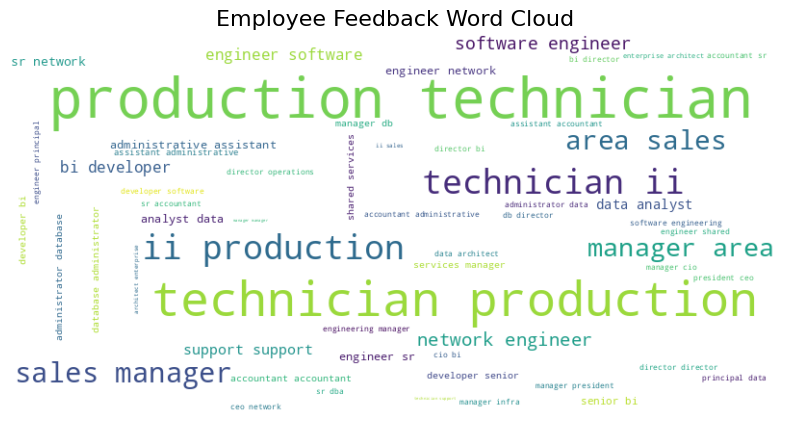

In [13]:

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Employee Feedback Word Cloud', fontsize=16)
plt.show()


In [16]:
# Enhancement 1: Sentiment Analysis (Positive / Negative / Neutral)
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df['sentiment_scores'] = df['clean_feedback'].apply(lambda x: sia.polarity_scores(x)['compound'])
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'
df['sentiment_label'] = df['sentiment_scores'].apply(classify_sentiment)
df.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,EmpID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,...,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating,clean_feedback,sentiment_scores,sentiment_label
0,3427,Uriah,Bridges,20-Sep-19,NaN,Production Technician I,Peter Oneill,uriah.bridges@bilearner.com,CCDR,Active,...,Accounting,Female,34904,White,Widowed,Fully Meets,4,production technician,0.0,Neutral
1,3428,Paula,Small,11-Feb-23,NaN,Production Technician I,Renee Mccormick,paula.small@bilearner.com,EW,Active,...,Labor,Male,6593,Hispanic,Widowed,Fully Meets,3,production technician,0.0,Neutral
2,3429,Edward,Buck,10-Dec-18,NaN,Area Sales Manager,Crystal Walker,edward.buck@bilearner.com,PL,Active,...,Assistant,Male,2330,Hispanic,Widowed,Fully Meets,4,area sales manager,0.0,Neutral
3,3430,Michael,Riordan,21-Jun-21,NaN,Area Sales Manager,Rebekah Wright,michael.riordan@bilearner.com,CCDR,Active,...,Clerk,Male,58782,Other,Single,Fully Meets,2,area sales manager,0.0,Neutral
4,3431,Jasmine,Onque,29-Jun-19,NaN,Area Sales Manager,Jason Kim,jasmine.onque@bilearner.com,TNS,Active,...,Laborer,Female,33174,Other,Married,Fully Meets,3,area sales manager,0.0,Neutral


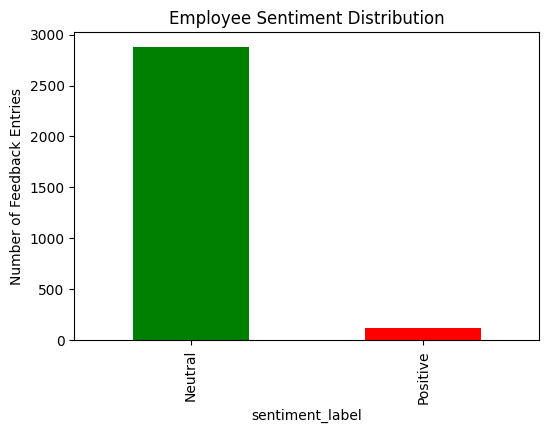

In [17]:
sentiment_counts = df['sentiment_label'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'], figsize=(6,4))
plt.title('Employee Sentiment Distribution')
plt.ylabel('Number of Feedback Entries')
plt.show()

In [14]:
from collections import Counter

word_counts = Counter(all_text.split())
common_words = word_counts.most_common(10)

trends_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
trends_df


,Word,Frequency
0,production,1991
1,technician,1837
2,manager,555
3,ii,516
4,sales,338
5,area,297
6,engineer,195
7,network,105
8,software,100
9,support,99


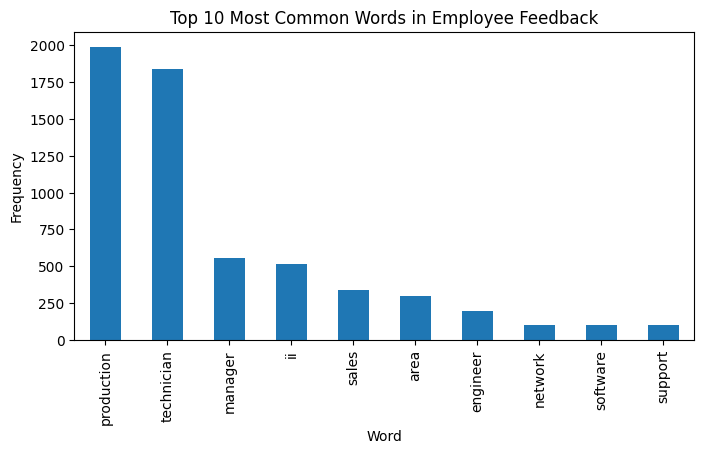

In [15]:
trends_df.plot(kind='bar', x='Word', y='Frequency', legend=False, figsize=(8,4))
plt.title("Top 10 Most Common Words in Employee Feedback")
plt.ylabel("Frequency")
plt.show()


Proportion of positive vs negative feedback

In [19]:
df['sentiment_scores']    # compound score (-1 to +1)
df['sentiment_label']     # 'Positive' / 'Neutral' / 'Negative'


,sentiment_label
0,Neutral
1,Neutral
2,Neutral
3,Neutral
4,Neutral
...,...
2995,Neutral
2996,Neutral
2997,Neutral
2998,Neutral


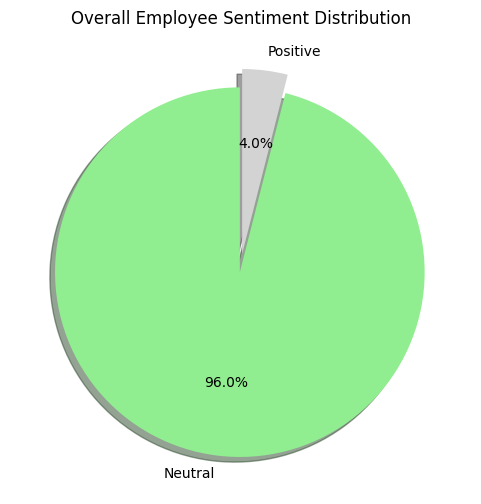

In [21]:
# --- Pie Chart of Sentiment ---
plt.figure(figsize=(6,6))
df['sentiment_label'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['lightgreen', 'lightgray', 'lightcoral'],
    startangle=90,
    explode=[0.05, 0.05], # Changed explode to match the number of categories
    shadow=True
)
plt.title('Overall Employee Sentiment Distribution')
plt.ylabel('')  # hide y-axis label
plt.show()